<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-06-04-Clustering/April_Aglo_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df = df.drop('CustomerID', axis = 1)
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
125,Female,31,70,77
171,Male,28,87,75
18,Male,52,23,29
20,Male,35,24,35
119,Female,50,67,57


In [4]:
df.rename(
      columns = {
          'Annual Income (k$)': 'AnnualIncome', 
          'Spending Score (1-100)': 'SpendingScore'
       }, inplace = True
    )
df.sample(3)

,Gender,Age,AnnualIncome,SpendingScore
92,Male,48,60,49
114,Female,18,65,48
96,Female,47,60,47


In [7]:
df['Gender'] = df['Gender'] == 'Male'

In [8]:
df.sample(3)

,Gender,Age,AnnualIncome,SpendingScore
68,True,19,48,59
14,True,37,20,13
65,True,18,48,59


In [19]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df)

In [24]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='ward', metric='euclidean')
# merg = linkage(X, method='ward', metric='euclidean')

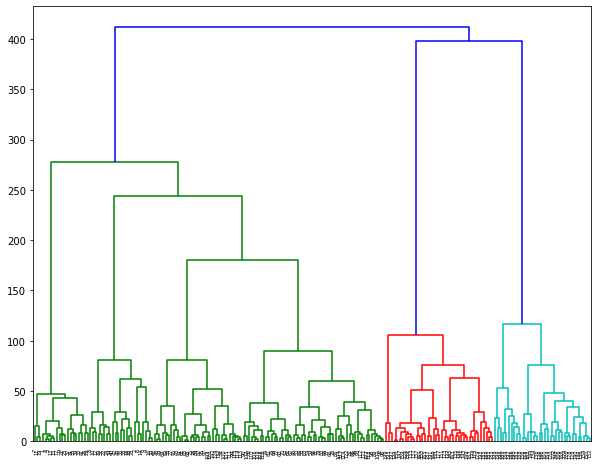

In [25]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))

dendrogram(merg)
plt.show()

In [28]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merg, n_clusters=5)
y_pred = y_pred.reshape(-1)

Text(0, 0.5, 'SpendingScore')

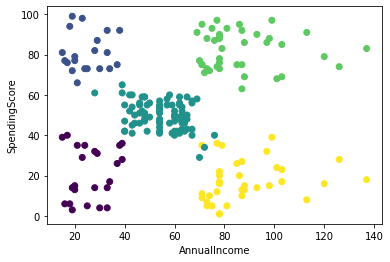

In [29]:
# Gender	Age	AnnualIncome	SpendingScore

plt.scatter(df['AnnualIncome'],	df['SpendingScore'], c = y_pred)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')

# DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [30]:
from sklearn.datasets import make_circles

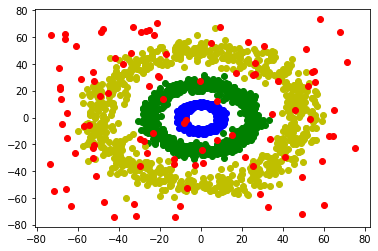

In [31]:
def circle():
    X, y = make_circles(noise = 0.1, factor = 0.3, n_samples = 1500)
    X = X[ y==0]
    y = y[y==0]
    return X, y

X1, y1 = circle()
X2, y2 = circle()
X3, y3 = circle()
n1 = np.random.rand(100, 2)*150 - 75
# n2 = np.random.rand(100)*150 - 75

X1 *= 10
X2 *= 25
X3 *= 50

plt.scatter(X1[:, 0], X1[:, 1], color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], color = 'y')
plt.scatter(n1[:, 0], n1[:, 1], color = 'r')

In [32]:
X = np.vstack([X1, X2, X3, n1])

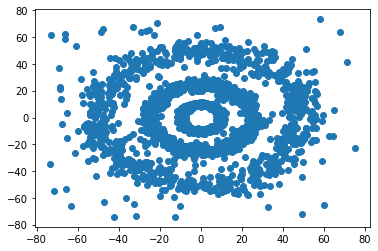

In [33]:
plt.scatter(X[:, 0], X[:, 1])

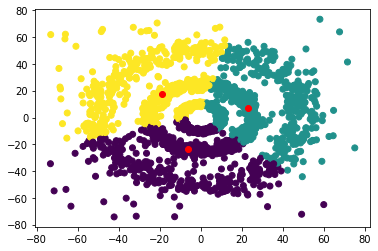

In [34]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(X)
plt.scatter(X[:, 0], X[:, 1], c = km.predict(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'red')

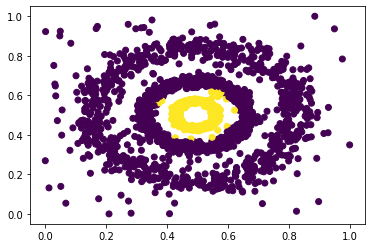

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(X)

db = DBSCAN(eps=0.05, min_samples=100)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)
# plt.scatter(db.components_[:, 0], db.components_[:,1], color = 'red')

In [51]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=8)
nn.fit(scaled)

NearestNeighbors(n_neighbors=8)

In [53]:
distance , _ = nn.kneighbors(scaled)
distance

array([[0.        , 0.00223711, 0.0023832 , ..., 0.00304846, 0.00401603,
        0.00414025],
       [0.        , 0.00238051, 0.00372546, ..., 0.00484991, 0.00614806,
        0.00630551],
       [0.        , 0.00169678, 0.00606784, ..., 0.00824742, 0.00850445,
        0.00940778],
       ...,
       [0.        , 0.0496354 , 0.06864776, ..., 0.07915001, 0.08306546,
        0.08617538],
       [0.        , 0.05619124, 0.07258476, ..., 0.07510033, 0.07560976,
        0.07729494],
       [0.        , 0.00397921, 0.00533349, ..., 0.01176572, 0.01489526,
        0.01769763]])

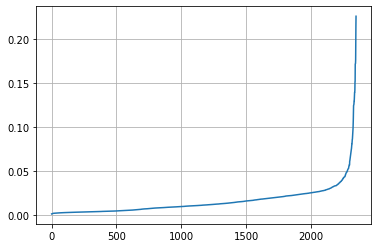

In [54]:
dis = distance[:, 5]

dis.sort()
plt.plot(dis)
plt.grid()
plt.show()

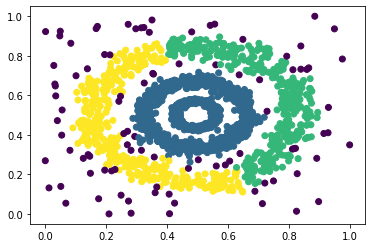

In [66]:
db = DBSCAN(eps=0.03, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

# plt.scatter(scaled[ y_pred==-1, 0], scaled[y_pred==-1, 1], color = 'r')

# Excercise

https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Unsupervised%20ML/Wholesale%20customers%20data.csv

# K-Means as Preprocessing

In [67]:
from sklearn.datasets import load_digits

In [76]:
X_digits, y_digits = load_digits(return_X_y=True)
X_digits = StandardScaler().fit_transform(X_digits)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [90]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [91]:
log_reg.score(X_test, y_test)

0.9733333333333334

In [92]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=50)),
 ("log_reg", LogisticRegression()),
])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [93]:
pipeline.score(X_test, y_test)

0.9311111111111111